# Parte 1: Conceitos básicos
### Parte prática

Neste material apresentamos ferramentas em Python para a manipulação de redes complexas. Vamos focar principalmente no uso do Networkx, biblioteca voltada para criação e manipulação de redes complexas.

Os tópicos aqui apresentados consistem em conceitos básicos, iniciando com a criação de instâncias de redes complexas de diferentes tipos (com peso, sem peso, com direção e sem direção), manipulação dos vértices e arestas, geração de redes não direcionadas a partir de redes direcionadas.

Essa biblioteca cobre as principais medidas e algoritmos conhecidos na Literatura de Redes Complexas. Quando estiver programando, em caso de dúvida recomendamos consultar a documentação disponível em https://networkx.org/documentation/stable/reference/index.html.

Nosso curso focará no uso do Networkx, entretanto outras ferramentas estão disponíveis na web conforme listadas no [link](
https://github.com/briatte/awesome-network-analysis).

In [1]:
'''
No google colab, o Networkx já está instalado. 
'''
# !pip install networkx
import networkx as nx

## Criando redes sem direção e com direção

In [2]:
graph = nx.Graph() # aqui estamos criando um grafo vazio, sem vértices ou arestas
# sem direção ou atributos

label = '1'
graph.add_node(label) # podemos adicionar apenas um vértice com o label informado como argumento
graph.add_nodes_from([1, 2, 3]) # ou adicionar uma lista de vértices

print(graph)

Graph with 4 nodes and 0 edges


In [3]:
graph.add_edge('1', 1) # usando os labels dos vértices, podemos adicionar arestas
graph.add_edges_from([('1', 2), (2, 3), (1, 3)]) # ou uma lista de vértices

print(graph)

Graph with 4 nodes and 4 edges


In [4]:
# temos métodos análogos para o caso de redes dirigidas 
dir_graph = nx.DiGraph() # rede vazia dirigida

label = 1
dir_graph.add_node(1) # adicionando vértices
dir_graph.add_nodes_from([2, 3, 4, 5]) 

dir_graph.add_edge(1, 2) # adicionando arestas direcionadas
dir_graph.add_edges_from([(2, 3), (3, 2), (3, 1), (5, 1), (3, 4)])

print(dir_graph)

DiGraph with 5 nodes and 6 edges


## Visualizando as redes

A visualização de redes complexas é uma área ampla por si só.
Para redes pequenas, as ferramentas de visualização oferecidas pelo Networkx podem ser interessantes. Aqui vamos apresentar o básico que pode facilitar no entendimento dos métodos apresentados ao longo do material. 

In [5]:
# vamos visualizar os dois grafos que criamos até o momento
import matplotlib.pyplot as plt
# Networkx usa o matplotlib para desenhar grafos
# por isso, podemos usar também as funções dessa outra biblioteca

pos = nx.circular_layout(graph) # aqui estamos definindo uma forma de calcula a posição dos vértices
nx.draw(graph, pos, node_color='orange') # além de passar a posição recém calculada, 
# também podemos informar outros parâmetros como a cor dos vértices
nx.draw_networkx_labels(graph, pos=pos) # adicionamos os labels dos vértices
plt.title('graph') # função do matplotlib para adicionar título
plt.show() # depois de todas as informações para gerar a figura, vamos visualizá-la

# Agora o grafo direcionado que criamos anteriormente
pos = nx.circular_layout(dir_graph)
nx.draw(dir_graph, pos=pos, with_labels=True, node_size=500) # with_labels é uma forma
# mais simples de adicionar os labels do vértices
plt.title('dir_graph')
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 432x288 with 0 Axes>

## Adicionando atributos

Vértices e arestas podem possuir atributos. 
Em particular, o peso (weight) da conexão das arestas é um atributo muito estudado. 

In [19]:
attr_graph = nx.Graph()

# adicionando atributos aos vértices
attr_graph.add_node(2, title='The Lord of the Rings', writer='Tolkien')
attr_graph.add_nodes_from([(3, {'title':'Dune', 'writer':'Frank Herbert'}), (4, {'title':'Brave New World', 'writer':'Huxley'})])

# adicionando atributos às arestas
attr_graph.add_edge(2, 3, weight=0.3)
attr_graph.add_edges_from([(2, 4, {'weight': 0.25})])

labels = nx.get_edge_attributes(attr_graph, 'weight')
pos = nx.circular_layout(attr_graph)
#nx.draw(attr_graph, pos=pos, with_labels=True, node_color='orange', node_size=600)
#nx.draw_networkx_edge_labels(attr_graph, pos, edge_labels=labels)
plt.show()

TypeError: '_AxesStack' object is not callable

<Figure size 432x288 with 0 Axes>

Mais informações sobre adição de atributos podem ser encontradas na documentação disponível em [link](https://networkx.org/documentation/networkx-1.7/tutorial/tutorial.html#adding-attributes-to-graphs-nodes-and-edges).

Como consultar vértices e arestas:

In [10]:
print("Vértices do grafo attr_graph:")
# os vértices podem ser acessados da seguinte forma
for vtx in attr_graph.nodes():
    print(vtx)

print("Forma alternativa de acessar os vértices do mesmo grafo:")
# dica: iterar sobre o objeto grafo também funciona
for vtx in attr_graph:
    print(vtx)

print("Arestas do grafo:")
# de forma similar, para as arestas podemos fazer
for edge in attr_graph.edges():
    print(edge)

Vértices do grafo attr_graph:
2
3
4
Forma alternativa de acessar os vértices do mesmo grafo:
2
3
4
Arestas do grafo:
(2, 3)
(2, 4)


## Matriz de adjacência

O método adjacency_matrix retorna a matriz que representa as conexões do grafo.
Para o caso de redes sem peso e sem direção, será uma matriz simétrica composta por 0s e 1s. No caso de redes sem peso e com direção, será uma matriz não simétrica de 0s e 1s. Finalmente, o valor 1 que normalmente indica a existência da conexão entre dois vértices será trocado pelo peso da conexão para as redes com peso.

A representação que o Networkx usa é de uma matriz esparça. Para visualização intuitiva podemos transformá-la para versão densa. Nota: no caso de redes com muitos vértices, esse procedimento pode não ser viável, pois a matriz gerada pode ocupar muita memória.

In [12]:
# rede sem peso e sem direção
print("Sem peso, sem direção:")
print(nx.adjacency_matrix(graph).todense())

# rede com direção
print("Com direção:")
print(nx.adjacency_matrix(dir_graph).todense())

# rede sem direção
print("Com peso:")
print(nx.adjacency_matrix(attr_graph).todense())

# Nota: quando uma aresta sem peso informado é adicionada, o valor padrão do peso é 1

print("Lista de adjacência:") 
for vtx, adj in attr_graph.adjacency():
    print(vtx, adj)
# no caso de redes direcionadas, a lista de adjacência indica vértices vizinhos 
# apontados pelo vértice em análise

Sem peso, sem direção:


/var/folders/92/s1pjkdhx2nq10s9xlz060s5h0000gn/T/ipykernel_77790/3531177059.py:3: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(nx.adjacency_matrix(graph).todense())


ModuleNotFoundError: No module named 'scipy'

## Rede de co-citação e acoplamento bibliográfico

Uma forma de transformar uma rede direcionada em não direcionada é extraindo a rede de co-citação. A ideia geral consiste em conectar dois vértices A e B caso ambos sejam apontados por um terceiro vértice C. Podemos incluir peso nas conexões ao considerarmos o número de vértices C que apontam para A e B.

O método apresentado a seguir é comumente utilizado para dados de citações de artigos. A ideia é análoga ao explicado anteriormente, artigos citados por um mesmo artigo devem ser conectados. 


In [13]:
import numpy as np
from itertools import combinations
from collections import defaultdict

def co_citation(digraph):
    di_nodes = digraph.nodes()
    graph = nx.Graph()
    graph.add_nodes_from(di_nodes)

    edges = defaultdict(lambda: 0) # key: edge, value: edge weight
    for node, adj in digraph.adjacency():
        neig = list(adj.keys())
        for edge in combinations(neig, 2):
            edges[edge] += 1

    graph.add_edges_from(list(edges.keys()))
    nx.set_edge_attributes(graph, edges, "weight")

    return graph

In [14]:
nx.draw(dir_graph, with_labels=True, node_color='orange')
plt.title('dir_graph')
plt.show()

co_cit_graph = co_citation(dir_graph)
nx.draw(co_cit_graph, with_labels=True, node_color='pink')
plt.title('co_cit_graph')
plt.show()

print('Informações do co_cit_graph:')
print(co_cit_graph.nodes())
print(co_cit_graph.edges())
print(nx.adjacency_matrix(co_cit_graph).todense())

ModuleNotFoundError: No module named 'matplotlib'

O acoplamento bibliográfico é outro tipo de rede também comum para dados de citações de artigos. Nesse caso, dois artigos são conectados quando citam outros artigos em comum. Uma forma de considerar peso nas conexões é o número de artigos C que A e B citam. 

In [15]:
def get_bibliographic_coupling_graph(digraph):
    di_nodes = digraph.nodes()
    graph = nx.Graph()
    graph.add_nodes_from(di_nodes)

    edges = []
    for node1, adj1 in digraph.adjacency():
        for node2, adj2 in digraph.adjacency():
            if node1 != node2:
                co = set(adj1.keys()) & set(adj2.keys())
                if len(co) > 0:
                    edges.append((node1, node2, len(co)))
                    
    graph.add_weighted_edges_from(edges)
    return graph

In [16]:
nx.draw(dir_graph, with_labels=True, node_color='orange')
plt.title('dir_graph')
plt.show()

coupling_graph = get_bibliographic_coupling_graph(dir_graph)
nx.draw(coupling_graph, with_labels=True, node_color='pink')
plt.title('coupling_graph')
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

## Ciclos em redes direcionadas

O Networkx tem métodos para a identificação dos ciclos em si, portanto, para confirmar se uma rede é ciclica ou acíclica podemos criar um métedo simples que confere a lista de saída do método já pronto. 

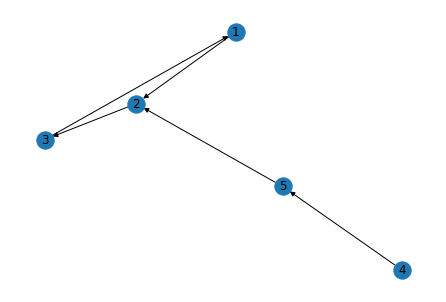

True
[1, 2, 3]


In [ ]:
# retorna um iterador sobre os ciclos do grafo
# Nota: esse método é específico para redes direcionadas
def has_cycle(graph):
    return len(list(nx.simple_cycles(graph))) > 0

cycle_graph = nx.DiGraph()
cycle_graph.add_nodes_from([1, 2, 3, 4, 5])
cycle_graph.add_edges_from([(1, 2), (2, 3), (3, 1), (4, 5), (5, 2)])
nx.draw(cycle_graph, with_labels=True)
plt.show()
print(has_cycle(cycle_graph))
for cycle in nx.simple_cycles(cycle_graph):
    print(cycle)

## Projeções de redes bipartidas

Redes bipartidas são redes com vértides que podem ser divididos em grupos distintos, existindo apenas conexões entre vértices de grupos distintos. Para esse tipo de rede, podemos gerar um grafo de projeção selecionando um grupo de vértices que desejamos focar. 

A seguir, utilizamos um método do Networkx que gera a projeção dada uma rede bipartida. Dois vértices de um grupo são conectados caso estejam conectados a um terceiro vértice em comum do outro grupo.

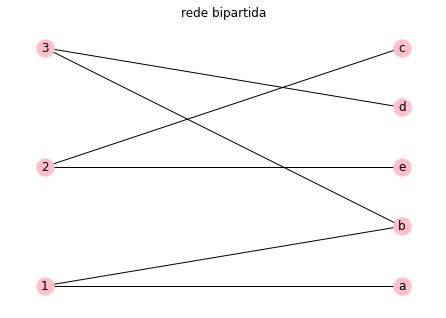

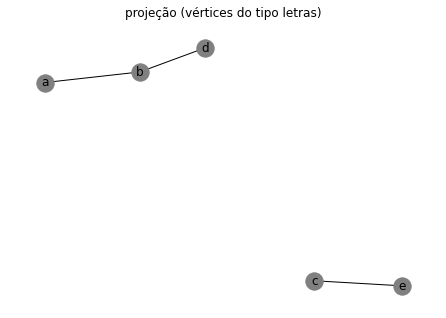

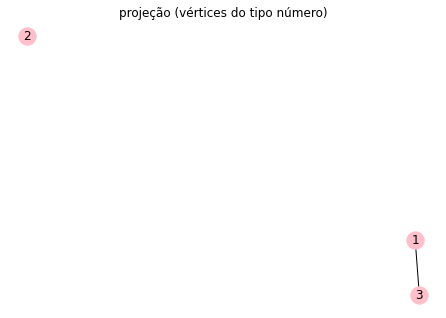

In [ ]:
bi_graph = nx.Graph()
bi_graph.add_edges_from([(1, "a"), (1, "b"), ("c", 2), ("d", 3), ("e", 2), (3, "b")])
pos = nx.bipartite_layout(bi_graph, nodes=[1, 2, 3])
nx.draw(bi_graph, pos=pos, with_labels=True, node_color='pink')
plt.title('rede bipartida')
plt.show()

projection_letters = nx.bipartite.projected_graph(bi_graph, ["a", "b", "c", "d", "e"])
nx.draw(projection_letters, with_labels=True, node_color='gray')
plt.title('projeção (vértices do tipo letras)')
plt.show()

projection_numbers = nx.bipartite.projected_graph(bi_graph, [1, 2, 3])
nx.draw(projection_numbers, with_labels=True, node_color='pink')
plt.title('projeção (vértices do tipo número)')
plt.show()

## Grau

O grau de um vértice é o número de vizinhos que o vértice tem, isto é, vértices diretamente conectados. Utilizando os métodos do Networkx, é possível consultar o grau de um vértice específico ou obter uma lista com o grau de todos os vértices da rede. Para os casos de redes com peso e com direção, a medida pode ser adaptada, como mostrado a seguir. 

In [ ]:
print('grau dos vértices do grafo sem peso, sem direção: ')
for node in graph.degree(): # podemos iterar sobre todos os vértices
    print(node) # tupla com o label do vértice e o grau correspondente

print('vértice \'1\', peso', graph.degree('1')) # para saber o grau de um vértice em particular
print('vértice 3, peso', graph.degree(3))

print('grafo com peso:') # quando informamos o atributo que representa o peso das arestas
for node in attr_graph.degree(weight='weight'):
    print(node)

print('grafo com direção:') # para o grafo com direção
print('- grau de entrada:')
for node in dir_graph.in_degree():
    print(node)
print('- grau de saída:')
for node in dir_graph.out_degree():
    print(node)

grau dos vértices do grafo sem peso, sem direção: 
('1', 2)
(1, 2)
(2, 2)
(3, 2)
vértice '1', peso 2
vértice 3, peso 2
grafo com peso:
(2, 0.55)
(3, 0.3)
(4, 0.25)
grafo com direção:
- grau de entrada:
(1, 2)
(2, 2)
(3, 1)
(4, 1)
(5, 0)
- grau de saída:
(1, 1)
(2, 1)
(3, 3)
(4, 0)
(5, 1)


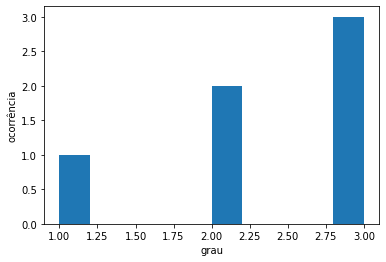

In [ ]:
# utilizando o matplotlib podemos visualizar a distribuição do grau dos vértices de uma rede
import math
import matplotlib.pyplot as plt

degree_graph = nx.Graph()
degree_graph.add_nodes_from([1, 2, 3, 4, 5, 6])
degree_graph.add_edges_from([(1, 2), (3, 4), (5, 2), (5, 6), (2, 3), (4, 1), (5, 1)])
degrees = [val for (node, val) in degree_graph.degree()]
plt.hist(degrees)
plt.xlabel('grau')
plt.ylabel('ocorrência')
plt.show()

# Parte 2: Medidas de redes

Há métodos do Networkx para medidas apresentadas nas aulas teóricas, conforme apresentado a seguir. 

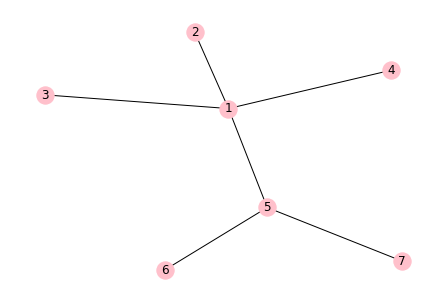

In [ ]:
# vamos utilizar o grafo a seguir para extrar as medidas de centralidade
metric_graph = nx.Graph()
metric_graph.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (5, 6), (5, 7)])
nx.draw(metric_graph, with_labels=True, node_color='pink')
plt.show()

eigenvector centrality:
1 0.63
2 0.29
3 0.29
4 0.29
5 0.50
6 0.23
7 0.23


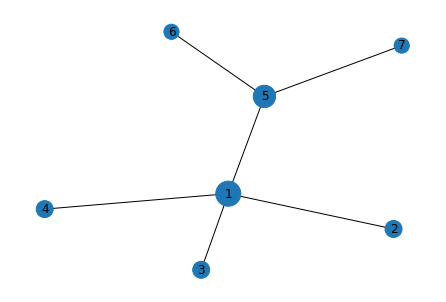

In [ ]:
# eigenvector centrality
print('eigenvector centrality:')
size_factor = []
for node, val in nx.eigenvector_centrality(metric_graph).items():
    print("%d %.2f" % (node, val))
    size_factor.append(val*1000)

# vamos visualizar a rede com os vértices com tamanho proporcional
# à medida de centralidade
nx.draw(metric_graph, node_size=size_factor, with_labels=True)
plt.show()

centralidade de Katz:
1 0.39
2 0.38
3 0.38
4 0.38
5 0.38
6 0.38
7 0.38


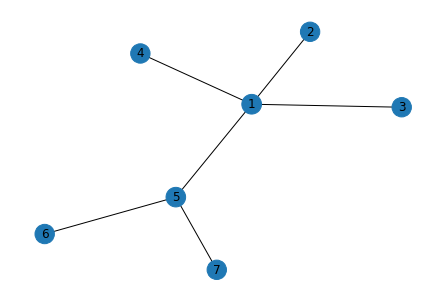

In [ ]:
# centralidade de Katz
print('centralidade de Katz:')
# os nomes dos parâmetros são diretamente adaptados do método apresentado na aula teórica
alpha = 0.01
beta = 1.0
size_factor = []
for node, val in nx.katz_centrality(metric_graph, alpha=alpha, beta=beta).items():
    print("%d %.2f" % (node, val))
    size_factor.append(val*1000)

nx.draw(metric_graph, node_size=size_factor, with_labels=True)
plt.show()

pagerank:
1 0.31
2 0.09
3 0.09
4 0.09
5 0.24
6 0.09
7 0.09


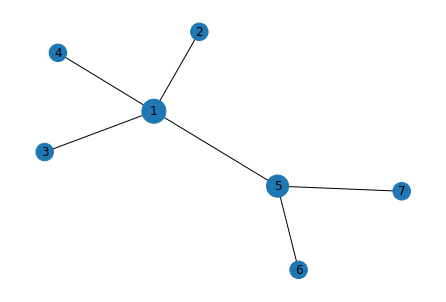

In [ ]:
# pagerank
print('pagerank:')
size_factor = []
for node, val in nx.pagerank(metric_graph).items():
    print("%d %.2f" % (node, val))
    size_factor.append(200 + val*1200)

nx.draw(metric_graph, node_size=size_factor, with_labels=True)
plt.show()

# Parte 3: Modelos de redes complexas

Por vezes, pode ser útil gerar redes de maneira procedural. Alguns modelos de geração de redes são bem estabelecidos na Literatura por servirem de referência para comparar com redes de dados real, por exemplo.

## Rede aleatória

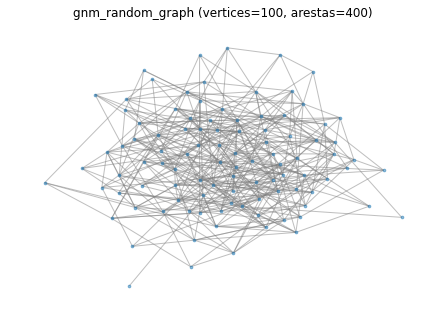

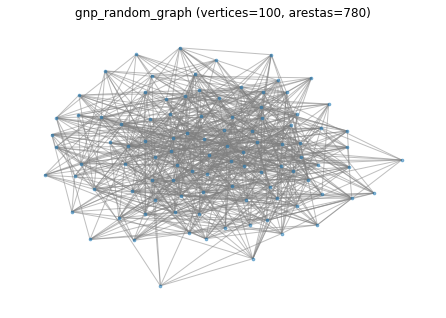

In [ ]:
n = 100
e = 400
p = 0.15
er = nx.gnm_random_graph(n, e) # nesse caso são especificados número de vértices e arestas

gi = nx.gnp_random_graph(n, p) # aqui o número de vértices e a probabilidade de 
# uma aresta ser criada entre dois vértices

nx.draw(er, node_size=7, edge_color='gray', alpha=0.5)
plt.title('gnm_random_graph (vertices=%d, arestas=%d)' % (len(er.nodes()), len(er.edges())))
plt.show()

nx.draw(gi, node_size=7, edge_color='gray', alpha=0.5)
plt.title('gnp_random_graph (vertices=%d, arestas=%d)' % (len(gi.nodes()), len(gi.edges())))
plt.show()

## Rede pequeno mundo (WS)

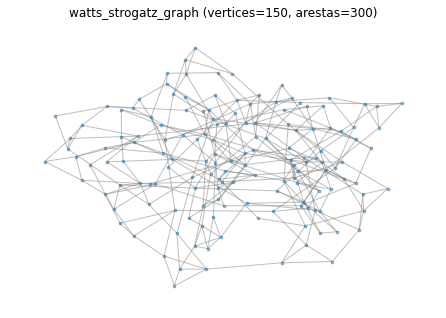

In [ ]:
n = 150 # número de vértices
k = 5 # grau de conexão com vizinhos
p = 0.3 # probabilidade de realocar uma aresta
ws = nx.watts_strogatz_graph(n, k, p)
nx.draw(ws, node_size=7, edge_color='gray', alpha=0.5)
plt.title('watts_strogatz_graph (vertices=%d, arestas=%d)' % (len(ws.nodes()), len(ws.edges())))
plt.show()

## Modelo de ligação preferencial (BA)

In [ ]:
n = 100
m = 5
ba = nx.barabasi_albert_graph(n, m)
nx.draw(ba, node_size=7, edge_color='gray', alpha=0.5)
plt.title('barabasi_albert_graph (vertices=%d, arestas=%d)' % (len(ba.nodes()), len(ba.edges())))
plt.show()

# Modelo de atratividade (disponível?)
# Modelo de fitness (disponível?)

# Parte 5: Detecção de comunidades

## Método de Girvan Newman

0 ({1, 2, 3, 4}, {5, 6, 7})
1 ({1, 3, 4}, {2}, {5, 6, 7})
2 ({1, 4}, {2}, {3}, {5, 6, 7})
3 ({1, 4}, {2}, {3}, {5, 7}, {6})
4 ({1}, {2}, {3}, {4}, {5, 7}, {6})
5 ({1}, {2}, {3}, {4}, {5}, {6}, {7})


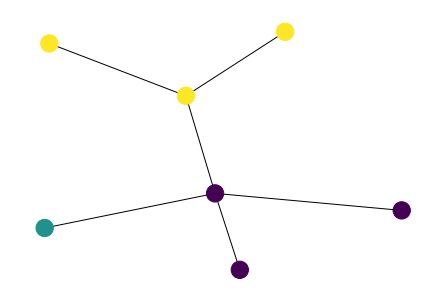

In [ ]:
# método Girvan Newman
# nesse caso, o método retorna um iterador com as comunidades encontradas a cada iteração do algoritmo
node_sets = None
for lvl, comms in enumerate(nx.algorithms.community.centrality.girvan_newman(metric_graph)):
    print(lvl, comms)
    if lvl == 1:
        node_sets = comms
        colors = dict()
        for i, comm in enumerate(comms):
            for vtx in comm:
                colors[vtx] = i

# vamos colocar o grafo conforme as comunidades indentificadas no lvl = 1
node_color = []
for vtx in metric_graph.nodes():
    node_color.append(colors[vtx])
nx.draw(metric_graph, node_color=node_color)
plt.show()

## Modularidade

A medida de modularidade quantifica a qualidade de uma divisão de vértices em grupos seguindo a ideia de que grupos bem formados são aqueles com muitas conexões internas e poucas conexões com vértices de outros grupos. 

O método modularity do Networkx espera receber como parâmetros um grafo e a partição dos vértices do grafo.

In [ ]:
# modularidade

# anteriormente salvamos na variável node_sets uma partição dos vértices gerada
# pelo algoritmo de Girvan Newman
print(node_sets)
nx.algorithms.community.quality.modularity(metric_graph, node_sets)

# vamos verificar a modularidade gerada para cada iteração do algoritmo
for lvl, comms in enumerate(nx.algorithms.community.centrality.girvan_newman(metric_graph)):
    mod = nx.algorithms.community.quality.modularity(metric_graph, comms)
    print(lvl, comms, mod)

({1, 3, 4}, {2}, {5, 6, 7})
0 ({1, 2, 3, 4}, {5, 6, 7}) 0.3194444444444445
1 ({1, 3, 4}, {2}, {5, 6, 7}) 0.23611111111111108
2 ({1, 4}, {2}, {3}, {5, 6, 7}) 0.13888888888888887
3 ({1, 4}, {2}, {3}, {5, 7}, {6}) 0.027777777777777773
4 ({1}, {2}, {3}, {4}, {5, 7}, {6}) -0.08333333333333334
5 ({1}, {2}, {3}, {4}, {5}, {6}, {7}) -0.20833333333333334


## Greedy modularity optimization

Neste caso, a ideia do algoritmo de Girvan Newman é utilizada, porém combinado com a medida de modularidade para indicar qual é a melhor partição encontrada. 

Ao contrário do método anterior que retorna um iterador, aqui já recebemos a partição ótima. 

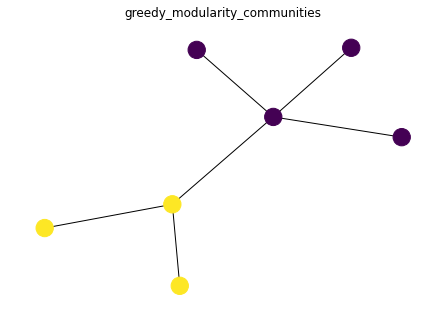

In [ ]:
partition = nx.algorithms.community.modularity_max.greedy_modularity_communities(metric_graph)

def idx_partition(partition, node):
    for i, p in enumerate(partition):
        if node in p:
            return i
    return None

node_color = []
for node in metric_graph.nodes():
    node_color.append(idx_partition(partition, node))
nx.draw(metric_graph, node_color=node_color)
plt.title('greedy_modularity_communities')
plt.show()

## Louvain

A versão estável do Networkx ainda não possui uma implementação do método Louvain. Assim, utilizamos uma biblioteca alternativa chamada python-louvain
que é compatível com Networkx.

In [ ]:
!pip install python-louvain

{1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1}


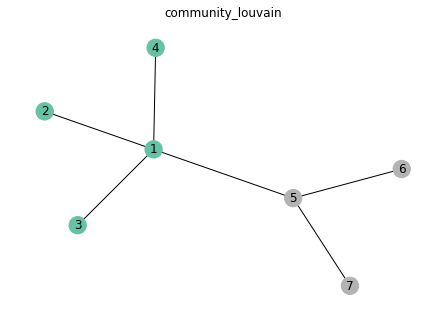

In [ ]:
import community.community_louvain as community_louvain # importando o método que vamos utilizar

partition_louvain = community_louvain.best_partition(metric_graph)
print(partition_louvain)

colors = list(partition_louvain.values())
nx.draw(metric_graph, with_labels=True, node_color=colors, cmap=plt.cm.Set2)
plt.title('community_louvain')
plt.show()

## Label propagation

O método de label propagation implementado em asyn_lpa_communities retorna um iterador, onde cada item é uma comunidade identificada (conjunto de vértices identificados pelo label).

[{1, 2, 3, 4, 5, 6, 7}]


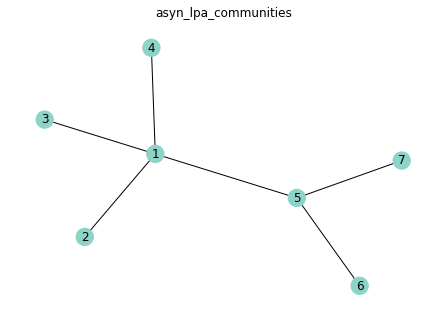

In [ ]:
partition_iter = nx.community.label_propagation.asyn_lpa_communities(metric_graph)
partition = []
for comm in partition_iter:
    partition.append(comm)
print(partition)

node_color = []
for node in metric_graph.nodes():
    node_color.append(idx_partition(partition, node))
nx.draw(metric_graph, with_labels=True, node_color=node_color, cmap=plt.cm.Set3)
plt.title('asyn_lpa_communities')
plt.show()

## Normalized mutual Information (NMI)

No contexto de detecção de comunidades, essa métrica pode ser utilizada para comparar uma partição identificada por algum algoritmo que estamos utilizando com a partição que sabemos previamente ser uma boa resposta (chamado também de ground truth). 

Essa medida não é necessariamente relacionada apenas com redes complexas, podendo ter um uso muito mais geral que não vamos entrar em detalhes nesse curso. Vamos utilizar a implementação disponível no sklearn.

In [ ]:
# Normalized mutual Information 
# !pip install sklearn
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi

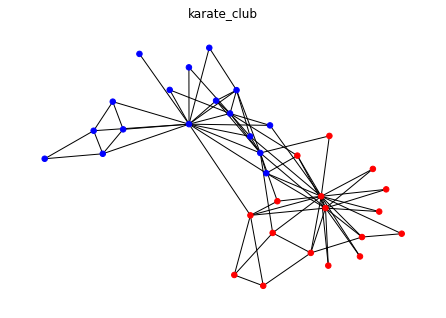

In [ ]:
# vamos utilizar uma rede clássica da literatura
# https://en.wikipedia.org/wiki/Zachary%27s_karate_club
karate_club = nx.karate_club_graph()

# Cada vértice representa um aluno e a cor do vértice seria o grupo (professor) 
# que o aluno pertence
ground_truth = ['blue' if karate_club.nodes[v]['club'] == 'Mr. Hi' else 'red' for v in karate_club.nodes()]
nx.draw(karate_club, node_size=30, node_color=ground_truth)
plt.title('karate_club')
plt.show()

[{0, 4, 5, 6, 10, 11, 12, 16, 19}, {1, 2, 3, 7, 13, 17, 21}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}, {24, 25, 28, 31}]
0.5908864451487963


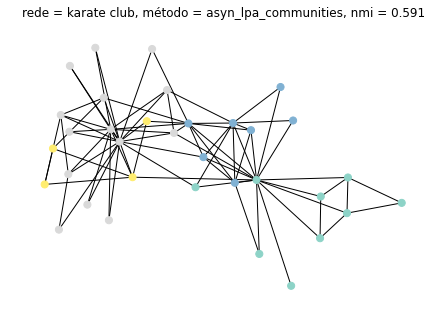

In [ ]:
# vamos comparar a partição identificada pelo label propagation com o ground truth
partition_iter = nx.community.label_propagation.asyn_lpa_communities(karate_club)
partition = []
for comm in partition_iter:
    partition.append(comm)
print(partition)

node_color = []
for node in karate_club.nodes():
    node_color.append(idx_partition(partition, node))

karate_nmi = nmi(ground_truth, node_color)
print(karate_nmi)

nx.draw(karate_club, node_size=50, node_color=node_color, cmap=plt.cm.Set3)
plt.title('rede = karate club, método = asyn_lpa_communities, nmi = %.3f' % karate_nmi)
plt.show()